# LISTA 01 - DSP
**Dupla:** David Machado Couto Bezerra & Gustavo Santiago
**Mestrado:** DEEC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

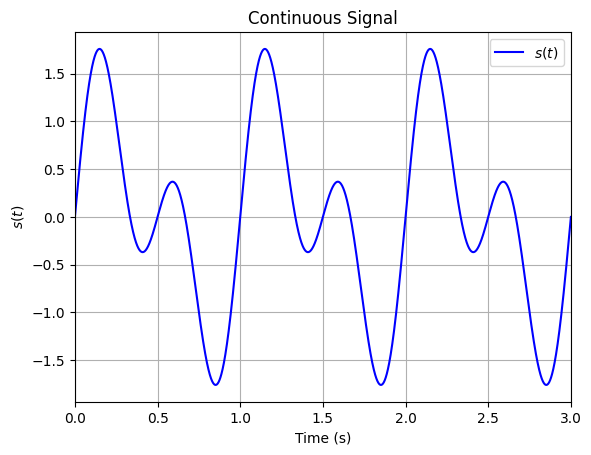

In [ ]:
"""
1.
  Gere um sinal composto por duas senóides de forma
  a contemplar pelo menos 3 períodos completos da
  senóide de menor frequência;
"""

fc1 = 1
fc2 = 2

t = np.linspace(0, 3, 10000)

s = np.sin(fc1*2*np.pi*t) + np.sin(fc2*2*np.pi*t)

plt.plot(t, s, 'b-', label=r'$s(t)$')
plt.xlabel('Time (s)')
plt.ylabel(r'$s(t)$')
plt.title('Continuous Signal')
plt.xlim(0, 3)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""
2.
  Plote esses sinais e simule o processo de conversão do sinal analógico para um sinal discreto no tempo e quantizado em amplitude com 10 bits;
  Realize a discretização no tempo respeitando o limite de Nyquist.
  Plote os sinais após a discretização no tempo e após a quantização.
  Estime o máximo erro de quantização.
"""

# Must have fs >= 2*fc
# then convert into period so we can sample it
# using the same equation used
fs = 10
Ts = 1/fs

#Sample the signal
n_samples = int(3 / Ts) + 1
n = np.linspace(0, 3, n_samples)
s_sampled = np.sin(2*np.pi*fc1*n) + np.sin(2*np.pi*fc2*n)

# Quantization
bits = 10
quant_levels = 2**bits
s_min, s_max = s_sampled.min(), s_sampled.max()
delta = (s_max - s_min) / (quant_levels - 1)
s_quantized = np.round((s_sampled - s_min) / (s_max - s_min) * (quant_levels - 1))
s_quantized = s_quantized * delta + s_min

max_error_theoretical = delta / 2

plt.plot(t, s, 'b-', label='Continuous Signal')
plt.stem(n, s_quantized, 'r-', markerfmt='ro', basefmt=" ", linefmt='r-', label='Sampled Signal')
plt.title('Continuous Signal and Sampled Signal (Discretized in Time)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)


print(f"Maximum Theoretical Quantization Error: {max_error_theoretical}")

In [ ]:
"""3.Recupere o sinal analógico a partir do sinal quantizado em amplitude e discreto no tempo. 
     Compare o sinal original x(t) com esse sinal recuperado plotando-os de forma sobreposta."""

s_reconstructed = np.interp(t, n, s_quantized)

plt.plot(t, s, 'b-', linewidth=2, label='Original')
plt.plot(t, s_reconstructed, 'r--', linewidth=1.5, label='Reconstructed')
plt.title('Comparison: Original vs Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Must have fs < 2*fc
fs = 1.5
Ts = 1/fs

n_samples = int(3 / Ts) + 1
n = np.linspace(0, 3, n_samples)
s_sampled = np.sin(2*np.pi*fc1*n) + np.sin(2*np.pi*fc2*n)

# using 6 bits for quantization
bits = 6
quant_levels = 2**bits
s_min, s_max = s_sampled.min(), s_sampled.max()
delta = (s_max - s_min) / (quant_levels - 1)
s_quantized = np.round((s_sampled - s_min) / (s_max - s_min) * (quant_levels - 1))
s_quantized = s_quantized * (s_max - s_min) / (quant_levels - 1) + s_min

delta = (s_max - s_min) / (quant_levels - 1)
max_error_theoretical = delta / 2

plt.plot(t, s, 'b-', label='Continuous Signal')
plt.stem(n, s_sampled, 'r-', markerfmt='ro', basefmt=" ", linefmt='r-', label='Sampled Signal')
plt.title('Continuous Signal and Sampled Signal (Discretized in Time)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)


print(f"Maximum Theoretical Quantization Error: {max_error_theoretical}")

In [ ]:
"""4 b).Recupere o sinal analógico a partir do sinal quantizado em amplitude e discreto no tempo. 
     Compare o sinal original x(t) com esse sinal recuperado plotando-os de forma sobreposta."""

s_reconstructed = np.interp(t, n, s_quantized)

plt.plot(t, s, 'b-', linewidth=2, label='Original')
plt.plot(t, s_reconstructed, 'r--', linewidth=1.5, label='Reconstructed')
plt.title('Comparison: Original vs Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()